## EM算法
与高斯判别模型相比,求解高斯混合模型的时候是不知道每条训练数据的类别标签的,在高斯混合模型中,数据的类别标签是一个隐变量.相对于求解$\theta^{MLE} = argmax_{\theta}(log(P(X|\theta)))$,求解GMM将使用EM算法:
1. 假设模型中存在隐变量Z 
2. 将生成一系列$\Theta$值,$\Theta = \{ \Theta^1,\Theta^2, \dots, \Theta^t\}$

在EM算法的每一步,皆要执行:
\begin{equation}
\Theta^{(g+1)} = argmax_{\Theta}(\int_Z log(P(X,Z|\Theta))P(Z|X,\Theta^{(g)})dz)
\end{equation}

为了证明这个迭代是收敛的,也就是需要证明:
\begin{equation}
log(P(X|\Theta^{(g+1)})) = L(\Theta^{(g+1)}) \ge L(\Theta^{(g)})
\end{equation}

$L(\Theta)等于:$
\begin{align*}
L(\Theta) &= In(P(X|\Theta)) \\
          &= In(P(X|\Theta)) \\
          &= In \left(\frac{P(X,Z|\Theta)}{P(Z|X,\Theta)}\right) \\
          &= In \left(\frac{\frac{P(X,Z|\Theta)}{Q(Z)}}{\frac{P(Z|X,\Theta)}{Q(Z)}}\right) \\
          &= In \left(\frac{P(X,Z|\Theta)}{Q(Z)} \times \frac{Q(Z)}{P(Z|X,\Theta)}\right) \\
          &= In \left(\frac{P(X,Z|\Theta)}{Q(Z)}\right) + In \left(\frac{Q(Z)}{P(Z|Z,\Theta)}\right) \\
          &= \int_Z In \left(\frac{P(X,Z|\Theta)}{Q(Z)}\right)Q(Z) + KL \left( Q(Z)||P(Z|X,\Theta)\right) \\
          &= 1 + 2 \\
\end{align*}

$KL(Q(Z)||P(Z|X,\Theta))$表示概率分布$Q(Z)$和$P(Z|X,\Theta)$之间的距离,KL散度是一个$\ge 0$的值.
因此可得到：
\begin{equation}
L(\Theta) \ge \int_Z In \left(\frac{P(X,Z|\Theta)}{Q(Z)}\right)Q(Z)
\end{equation}

由Jensen不等式也可以得到:
\begin{align*}
L(\theta) &= In \left( P(X|\Theta) \right) \\
          &= In \left( \int_Z \frac{P(X,Z|\Theta)}{Q(Z)} Q(Z) \right) \\
          &\ge \int_Z In \left( \frac{P(X,Z|\Theta)}{Q(Z)} Q(Z) \right) \\
\end{align*}

### E-M算法2步流程:求两个最大化.

**Step 1:** 固定$\Theta$,令$\Theta = \Theta^{(g)}$,最大化$Q(Z)$.
为了使$KL(.) = 0$,也就是要让$L(\Theta)$等于第1项.
而当$Q(Z)=P(Z|X,\Theta^{(g)})$,$KL(.) = 0$,得到:
\begin{equation}
L(\Theta) = \int_Z In \left( \frac{P(X,Z|\Theta)}{P(Z|X,\Theta^{(g)})} \right) P(Z|X,\Theta^{(g)})
\end{equation}

**Step 2:** 固定$Q(Z)$,求参数最大化:
\begin{equation}
\Theta^{(g+1)} = argmax_{\Theta} \left( \int_Z log(P(X,Z|\Theta))P(Z|X,\Theta^{(g)}) \right)dz
\end{equation}

### E-M算法收敛性证明.
\begin{align*}
L(\Theta) &= In \left( P(X|\Theta) \right) \\
          &= \int_Z In \left( P(X,Z|\Theta)\right) P(Z|X,\Theta^{(g)})dz - \int_Z In \left( P(Z|X,\theta)\right)P(Z|X,\Theta^{(g)})dz \\
          &= F(\Theta, \Theta^{(g)}) - H(\Theta, \Theta^{(g)})\\
\end{align*}

也就是需要证明:
\begin{align*}
\Theta^{(g)} &= argmax_{\Theta} \left( \int_Z In(P(Z|X,\Theta))P(Z|X,\Theta^{(g)}) \right) \\
             &\Longrightarrow H(\Theta^{(g+1)},\Theta^{(g)}) \le H(\Theta^{(g)}, \Theta^{(g)}) 
\end{align*}

然后证明:
\begin{align*}
L(\Theta^{(g+1)}) &= F(\Theta^{(g+1)}, \Theta^{(g)}) - H(\Theta^{(g+1)}, \Theta^{(g)})  \\
                  &\ge F(\Theta^{(g)}, \Theta^{(g)}) - H(\Theta^{(g)}, \Theta^{(g)})  \\
                  &= L(\Theta^{(g)})
\end{align*}

**证明**$H(\Theta^{(g+1)}, \Theta^{(g)}) \le H(\Theta^{(g)}, \Theta^{(g)})$:
\begin{align*}
H(\Theta^{(g)}, \Theta^{(g)}) - H(\Theta, \Theta^{(g)}) &= \int_Z In(P(Z|X,\Theta^{(g)}))P(Z|X,\Theta^{(g)})dz - \int_Z In(P(Z|X,\Theta))P(Z|X,\Theta^{(g)})dz \\
&= \int_Z In \left( \frac{P(Z|X,\Theta^{(g)})}{P(Z|X,\Theta)} \right) P(Z|X,\Theta^{(g)}) dz \\
&= \int_Z -In \left( \frac{P(Z|X,\Theta)}{P(Z|X,\Theta^{(g)})} \right)P(Z|X,\Theta^{(g)}) dz \\
&\ge -In \left( \int_Z \frac{P(Z|X,\Theta)}{P(Z|X,\Theta^{(g)})} P(Z|X,\Theta^{(g)}) dz \right)  \\
&= 0
\end{align*}

**证明**$F(\Theta^{(g+1)}, \Theta^{(g)}) \ge F(\Theta^{(g)}, \Theta^{(g)})$:

由上可知,$H(\Theta, \Theta^{(g)})$在参数为$\Theta^{(g)}$处取得最大值,随着$\Theta$的不断迭代进化,$H(\Theta, \Theta^{(g)})$将越来越小. 因而,求$L(\Theta)$的参数的最大似然估计,就转变为求$F(\Theta, \Theta^{(g)})$的参数最大化.

## 高斯混合模型(GMM)

\begin{equation}
P(x|\Theta) = \sum_{l=1}^k \alpha_l N(x|\mu_l, \Sigma_l) \\
\sum_{l=1}^k \alpha_l = 1 \\
\Theta = \left\{ \alpha_1,\ldots,\alpha_k, \mu_1,\ldots,\mu_k, \Sigma_1,\ldots,\Sigma_k \right\}
\end{equation}

数据集$X = \{x_1,\ldots, x_m\}$,大小为m,每一条数据$x_i$对应隐变量集合$Z = \{z_1, \ldots, z_m\}$中的某个$z_i$,它指示$x_i$属于混合高斯中的那个部分的高斯分布.
$z_i \in \{1, \ldots, k\}$,总共有k个不同的分类.

**EM算法**的参数最大化过程为:
\begin{align*}
\Theta^{(g+1)} &= argmax_{\Theta} \left( F(\theta, \Theta^{(g)})\right) \\
               &= argmax_{\Theta} \left( \int_Z In(P(X,Z|\theta))P(Z|X,\Theta^{(g)}) dz\right) \\
\end{align*}

**定义**$P(X,Z|\Theta)$
\begin{equation}
P(X|\Theta) = \prod_{i=1}^m p(x_i|\Theta) = \prod_{i=1}^m \sum_{l=1}^k \alpha_l N(x_i|\mu_l, \Sigma_l) \\
P(X,Z|\Theta) = \prod_{i=1}^m p(x_i, z_i|\Theta) = \prod_{i=1}^m p(x_i|z_i,\Theta)p(z_i|\Theta)=\prod_{i=1}^m \alpha_{zi} N(x_i|\mu_{z_i}, \Sigma_{z_i})
\end{equation}

**定义**$P(Z|X,\Theta)$
\begin{equation}
P(Z|X,\Theta) = \prod_{i=1}^m p(z_i|x_i, \Theta) = \prod_{i=1}^m \frac{\alpha_{zi} N(\mu_{zi}, \Sigma_{zi})}{\sum_{l=1}^k \alpha_l N(\mu_l, \Sigma_l)}
\end{equation}

### E-step:
\begin{align*}
F(\Theta, \Theta^{(g)}) &= \int_Z In(P(X,Z|\Theta))P(Z|X,\Theta^{(g)}) dz \\
                        &= \int_{z_1} \dots \int_{z_m} \left( \sum_{i=1}^m In(p(x_i, z_i|\Theta)) \prod_{i=1}^m p(z_i|x_i, \Theta^{(g)})\right) dz_1,\dots,dz_m \\
                        &= \int_{z_1} \dots \int_{z_m} \left( In(p(x_i, z_i|\Theta)) \prod_{i=1}^m p(z_i|x_i, \Theta^{(g)})\right) \prod_{i=1}^m dz_i + \ldots \\
                        &= \int_{z_1} \left( \int_{z_2} \dots \int_{z_m} In(p(x_i, z_i|\Theta)) \prod_{i=1}^m p(z_i|x_i, \Theta^{(g)}) \prod_{i=2}^m dz_i \right) dz_1  + \ldots \\
                        &= \int_{z_1} In(p(x_i, z_i|\Theta)) \left( \int_{z_2} \dots \int_{z_m} \prod_{i=1}^m p(z_i|x_i, \Theta^{(g)}) \prod_{i=2}^m dz_i \right) dz_1 + \ldots \\
                        &= \sum_{i=1}^m \left( \int_{z_i} In(p(z_i,x_i|\Theta))p(z_i|x_i,\Theta^{(g)})dz_i \right) \\
                        &= \sum_{i=1}^m \sum_{z_i=1}^k In(p(z_i,x_i|\Theta))p(z_i|x_i,\Theta^{(g)}) \\
                        &= \sum_{z_i=1}^k \sum_{i=1}^m In(p(z_i,x_i|\Theta))p(z_i|x_i,\Theta^{(g)}) \\
                        &= \sum_{l=1}^k \sum_{i=1}^m In(\alpha_l N(x_i|\mu_l,\Sigma_l))p(l|x_i, \Theta^{(g)}) \\
                        &= \sum_{l=1}^k \sum_{i=1}^m In(\alpha_l)p(l|x_i, \Theta^{(g)}) + \sum_{l=1}^k \sum_{i=1}^m In(N(x_i|\mu_l,\Sigma_l))p(l|x_i, \Theta^{(g)}) \\
                        &= 3 + 4
\end{align*}

### M-step: maximizing $\alpha$
如前,$F(\Theta,\Theta^{(g)})$只有3式包含$\alpha$参数,对$F$求$\alpha$的偏导数,后一项等于0,因而只取3式来求$\alpha$参数.

\begin{equation}
\frac{\partial F(\Theta,\Theta^{(g)})}{\partial \alpha_1, \ldots, \partial \alpha_k} = [0, \ldots, 0 ] \ subject\ to\ \sum_{l=1}^k \alpha_l = 1
\end{equation}

使用拉格朗日乘数法:
\begin{align*}
LM(\alpha_1,\ldots,\alpha_k, \lambda) &= \sum_{l=1}^k In(\alpha_l) \left( \sum_{i=1}^m p(l|x_i, \Theta^{(g)}) \right) - \lambda \left(\sum_{l=1}^k \alpha_l -1 \right) \\
&\Longrightarrow \frac{\partial LM}{\partial \alpha_l} = \frac{1}{\alpha_l} \left( \sum_{i=1}^m p(l|x_i, \Theta^{(g)}) \right) - \lambda = 0 \\
&\Longrightarrow \alpha_l = \frac{1}{\lambda} \sum_{i=1}^m  p(l|x_i, \Theta^{(g)}) \\
&\Longrightarrow \sum_{l=1}^k \alpha_l = \frac{1}{\lambda} \sum_{l=1}^k \sum_{i=1}^m p(l|x_i, \Theta) = 1 \\
&\Longrightarrow \frac{1}{\lambda} \sum_{i=1}^m \sum_{l=1}^k  p(l|x_i, \Theta) = 1 \\
&\Longrightarrow \lambda = m \\
&\Longrightarrow \alpha_l = \frac{1}{m} \sum_{i=1}^m  p(l|x_i, \Theta^{(g)}) \\
\end{align*}

### 线性代数的一些求导公式:
**行列式X对数的导数(带行列式):**
\begin{equation}
\frac{\partial In(|X|)}{\partial X} = (X^{-1})^T
\end{equation}

**矩阵X迹的求导,$f(.)$是$F(.)$的导数:**
\begin{equation}
\frac{\partial tr(F(X))}{\partial X} = (f(X))^T
\end{equation}

**矩阵X作为迹运算因子的矩阵求导1:**
\begin{equation}
\frac{\partial tr(A X B)}{\partial X} = A^T B^T
\end{equation}

**矩阵X作为迹运算因子的矩阵求导2:**
\begin{equation}
\frac{\partial tr(X + A)^{-1}}{\partial X} = -((X+A)^{-1}(X+A)^{-1})^T
\end{equation}

**矩阵X作为迹运算因子的矩阵求导3:**
\begin{equation}
\frac{\partial tr(AX^{-1}B)}{\partial X} = -(X^{-1}BAX^{-1})^T
\end{equation}


### 关于迹的一些运算
\begin{equation}
tr(a) = a,\ a\ is\ constant \\
tr(AB) = tr(BA) \\
tr(ABC) = tr(CAB) = tr(BCA)
\end{equation}

### M-step: maximizing $\mu$
求解$\mu, \Sigma$只和4式有关,因为3式不包含参数$\mu, \Sigma$,对其求偏导数为0.

\begin{align*}
4 &= \sum_{l=1}^k \sum_{i=1}^m In(N(x_i|\mu_l,\Sigma_l))p(l|x_i, \Theta^{(g)}) \\
&= \sum_{l=1}^k \sum_{i=1}^m In\left(\frac{1}{\sqrt{(2\pi)^d|\Sigma_l|}}exp\left( -\frac{1}{2} (x_i - \mu_l)^T\Sigma^{-1}(x_i-\mu_l)\right)\right) p(l|x_i, \Theta^{(g)})\\
&\Rightarrow \sum_{l=1}^k \left( \frac{d}{2}In(2\pi) - \frac{1}{2}In(|\Sigma|) - \frac{1}{2}tr(\Sigma^{-1}YY^T) \right) p(l|x_i, \Theta^{(g)})\\
\end{align*}

这里,$Y = X-\mu_l$,而且$(x_i - \mu_l)^T\Sigma^{-1}(x_i-\mu_l)$是一个常数,常数的迹为其本身.包含$\mu_l,\Sigma_l^{-1}$的项为$S(\mu_l,\Sigma_l^{-1})$.
\begin{align*}
S(\mu_l,\Sigma_l^{-1}) &= -Tr\left( \frac{\Sigma_l^{-1}}{2} \sum_{i=1}^m (x_i - \mu_l)(x_i - \mu_l)^T p(l|x_i,\Theta^{(g)})\right) \\
\frac{\partial S(\mu_l,\Sigma_l^{-1})}{\partial \mu_l} &= \frac{\Sigma_l^{-1}}{2} \sum_{i=1}^m 2(x_i - \mu_l)p(l|x_i,\Theta^{(g)}) = 0 \\
&\Rightarrow \mu_l = \frac{\sum_{i=1}^m x_i p(l|x_i, \Theta^{(g)})}{\sum_{i=1}^m p(l|x_i, \Theta^{(g)})}
\end{align*}

### M-step: maximizing $\Sigma$
求解$\mu, \Sigma$只和4式有关,因为3式不包含参数$\mu, \Sigma$,对其求偏导数为0.
定义,$Y = X-\mu_l$,$P$为一个对角矩阵,概率分布$L$,则有:
\begin{equation}
L \equiv L(p(Y|\mu_l,\Sigma_l)) = -\frac{d \times tr(P)}{2}In(2\pi) - \frac{tr(P)}{2}In(|\Sigma_l|) - \frac{1}{2}tr(\Sigma_l^{-1}YPY^T)
\end{equation}

\begin{align*}
\frac{\partial L}{\partial \Sigma_l} &= \Sigma_l^{-1}YPY^T\Sigma_l^{-1} - tr(P)\Sigma_l^{-1} = 0 \\
&\Rightarrow  \Sigma_l^{-1}YPY^T\Sigma_l^{-1} = tr(P)\Sigma_l^{-1} \\
&\Rightarrow YPY^T\Sigma_l^{-1} = tr(P) \\
&\Rightarrow \Sigma_l^{-1} = tr(P)(YPY^T)^{-1} \\
&\Rightarrow \Sigma_l = tr(P)^{-1}(YPY^T) = \frac{(YPY^T)}{tr(P)} \\
&= \frac{\sum_{i=1}^m (x_i - \mu_l)(x_i - \mu_l)^T p(l|x_i, \Theta^{(g)})}{\sum_{i=1}^m p(l|x_i, \Theta^{(g)})} 
\end{align*}

## 总结
\begin{equation}
\alpha_l^{(g+1)} = \frac{1}{m} \sum_{i=1}^m p(l|x_i, \Theta^{(g)}) \\
\mu_l^{(g+1)} = \frac{\sum_{i=1}^m x_i p(l|x_i, \Theta^{(g)})}{\sum_{i=1}^m p(l|x_i, \Theta^{(g)})} \\
\Sigma_l^{(g+1)} = \frac{\sum_{i=1}^m (x_i - \mu_l)(x_i - \mu_l)^T p(l|x_i, \Theta^{(g)})}{\sum_{i=1}^m p(l|x_i, \Theta^{(g)})} \\
p(l|x_i, \Theta^{(g)}) = \frac{ N(x_i|\mu_l, \Sigma_l)}{\sum_{s=1}^k  N(x_i|\mu_s, \Sigma_s)}
\end{equation}

(1000, 2)
(800, 2)
(800,)


Text(0.5,1,'X_test')

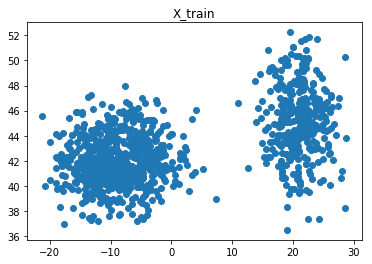

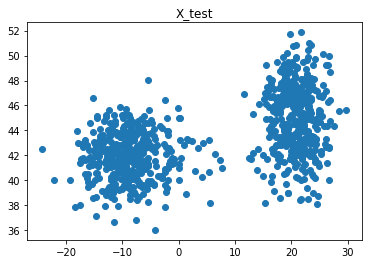

In [7]:
import numpy as np
import matplotlib.pyplot as plt

m_samples = 1000
t_samples = 400
np.random.seed(0)

mu_1 = np.array([7, 15])
sigma_1 = np.array([[3, 0], [0, 3]])
train_sample_1 = np.random.randn(m_samples, 2) + mu_1
train_sample_1 = np.dot(train_sample_1, sigma_1)
test_sample_1 = np.random.randn(t_samples, 2) + mu_1
test_sample_1 = np.dot(test_sample_1, sigma_1)
test_label_1 = np.zeros(t_samples)

mu_2 = np.array([-3, 21])
sigma_2 = np.array([[5, 0], [0.3, 2]])
train_sample_2 = np.random.randn(m_samples * 2, 2) + mu_2
train_sample_2 = np.dot(train_sample_2, sigma_2)
test_sample_2 = np.random.randn(t_samples, 2) + mu_2
test_sample_2 = np.dot(test_sample_2, sigma_2)
test_label_2 = np.ones(t_samples)

X_train = np.vstack([train_sample_1, train_sample_2])
idxs = xrange(X_train.shape[0])
idxs = np.random.choice(idxs, m_samples, replace=False)
X_train = X_train[idxs]

X_test = np.vstack([test_sample_1, test_sample_2])
X_test_label = np.concatenate([test_label_1, test_label_2])

print(X_train.shape)
print(X_test.shape)
print(X_test_label.shape)
plt.figure(1)
plt.scatter(X_train[:,0],X_train[:,1])
plt.title('X_train')
plt.figure(2)
plt.scatter(X_test[:,0], X_test[:,1])
plt.title('X_test')

### 参数$\alpha$
隐变量$Z=\{ z_1,\ldots,z_m\}$,$Z \sim Multinomial(\alpha)$,即Z服从于一个以$\alpha$为参数的多项式分布,这里$\alpha = \{ \alpha_1, \ldots, \alpha_k\}$,表示k个分类中的每个分类的概率,$\sum_{l=1}^k \alpha_l = 1$.而参数$\alpha$服从于一个狄利克雷分布,即$\alpha \sim Dirichlet([a_1,a_2,\ldots,a_k])$.

对于一个只有两个类的二分类问题而言,$Z=\{ z_1,z_2\}$,$Z \sim Binomial(\phi)$,这里的$\phi = \alpha$, $\phi \sim Beta(a,b)$,因此可以从一个beta分布中采样生成$\alpha$的值.

In [183]:
def N(x, mu, sigma):
    sig_det = np.linalg.det(sigma)
    sig_inv = np.linalg.inv(sigma)
    div_val = 2 * np.pi * np.sqrt(sig_det)
    # x=[1x2]
    tx = np.dot(x - mu, sig_inv)
    tx = np.dot(tx, (x - mu).T)
    px = (np.exp(-0.5 * tx) / div_val).flatten()[0]
    
    return px

def trainGMM(X_train, epoch):
    np.random.seed(6)
    m,D = X_train.shape
    
    # 随机生成\Theta_0
    # 从beta分布采样一个二项分布的参数
    # 1类的概率
    a_1 = np.random.beta(3,4,size=1)  
    a_1 = np.around(a_1, decimals=2)[0] # 只取2位小数
    # 2类的概率
    a_2 = 1 - a_1
    mu_1 = np.random.randn(1,2)
    mu_2 = np.random.randn(1,2)
    sigma_1 = np.random.randn(2,2)
    sigma_2 = np.random.randn(2,2)
    
    # 迭代优化
    for e in range(epoch):
        psum_1 = 0
        psum_2 = 0
        mu_sum_1 = np.zeros((1,2))
        mu_sum_2 = np.zeros((1,2))
        sig_sum_1 = np.zeros((2,2))
        sig_sum_2 = np.zeros((2,2))
        for i in range(m):
            x = X_train[i].reshape(1,2)
            # 在计算样本在各高斯分类下的概率总和时
            # 在训练过程中，加入各分类的权重影响会过早的陷入过拟合的状态
            # 即放大权重高的分类的影响,使得权重低的分类太早的收敛到0
            # 使得训练过程中出现权重低的部分的sigma过早为0,使得训练出错
            #c1 = a_1 * N(x, mu_1, sigma_1)
            #c2 = a_2 * N(x, mu_2, sigma_2)
            c1 = N(x, mu_1, sigma_1)
            c2 = N(x, mu_2, sigma_2)
            p1 = c1 / (c1 + c2)
            p2 = c2 / (c1 + c2)
            psum_1 += p1
            psum_2 += p2
            mu_sum_1 += x * p1
            mu_sum_2 += x * p2
            tx_1 = np.dot((x - mu_1).T, x - mu_1)
            tx_2 = np.dot((x - mu_2).T, x - mu_2)
            sig_sum_1 += tx_1 * p1
            sig_sum_2 += tx_2 * p2
        # 更新参数
        a_1 = psum_1 / float(m)
        a_2 = psum_2 / float(m)
        mu_1 = mu_sum_1 / psum_1
        mu_2 = mu_sum_2 / psum_2
        sigma_1 = sig_sum_1 / psum_1
        sigma_2 = sig_sum_2 / psum_2
        
    theta = {'a1':a_1, 'a2':a_2, 'mu1':mu_1, 'mu2':mu_2, 'sig1':sigma_1, 'sig2':sigma_2}
    return theta
            
            
            
    
theta = trainGMM(X_train, 100)
print(theta['a1'])
print(theta['a2'])
print(theta['mu1'])
print(theta['mu2'])
print(theta['sig1'])
print(theta['sig2'])

0.33798722568970563
0.6620127743102943
[[20.94006314 45.15960195]]
[[-8.70950345 41.99855927]]
[[ 8.99880425 -0.21349852]
 [-0.21349852  8.37497791]]
[[24.01209826  0.60455193]
 [ 0.60455193  3.97427246]]


accuracy is 100 %


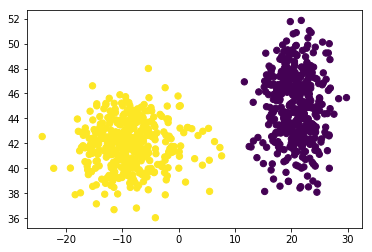

In [186]:
def prediction(X_test, theta):
    m = X_test.shape[0]
    a1 = theta['a1']
    a2 = theta['a2']
    mu1 = theta['mu1']
    mu2 = theta['mu2']
    sig1 = theta['sig1']
    sig2 = theta['sig2']
    
    pre_label = []
    for i in range(m):
        x = X_test[i].reshape(1,2)
        # 计算总概率的时候,需要加入各个高斯分布的权重影响
        p1 = a1 * N(x, mu1, sig1)
        p2 = a2 * N(x, mu2, sig2)
        #p1 = N(x, mu1, sig1)
        #p2 = N(x, mu2, sig2)
        if p1 > p2:
            pre_label.append(0)
        else:
            pre_label.append(1)
            
    return pre_label

pre_label = prediction(X_test,theta)
total_num = len(pre_label)
hit_num = X_test_label[X_test_label == pre_label].shape[0]
accuracy = float(hit_num) / float(total_num)
print('accuracy is %d %%' % (accuracy * 100))
plt.scatter(X_test[:, 0], X_test[:, 1], c=pre_label, s=40, cmap='viridis'); 

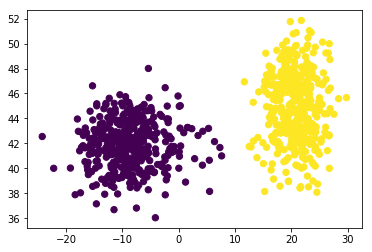

In [187]:
from sklearn import mixture

# GMM的分类器，n_components 代表有几个高斯分量，
# covariance_type 代表协方差矩阵的类型，
# 'full'代表每个高斯分量都有自己的协方差矩阵，
# 另外比如还有'tied',代表每个分量的协方差矩阵都是相同的
gmm = mixture.GaussianMixture(n_components = 2, covariance_type = 'full')
gmm.fit(X_train)

#score = clf.score_samples(X_test)

labels = gmm.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, s=40, cmap='viridis'); 

In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
